## Ti_0.2N

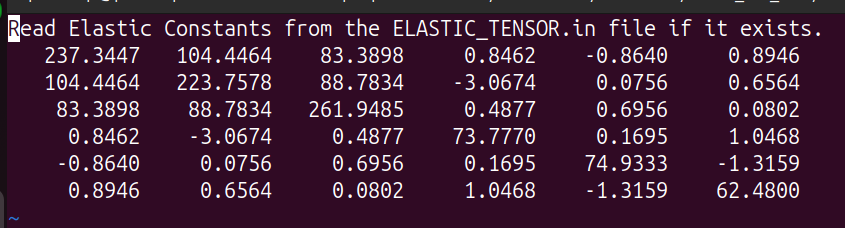
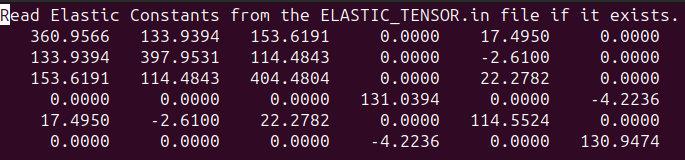

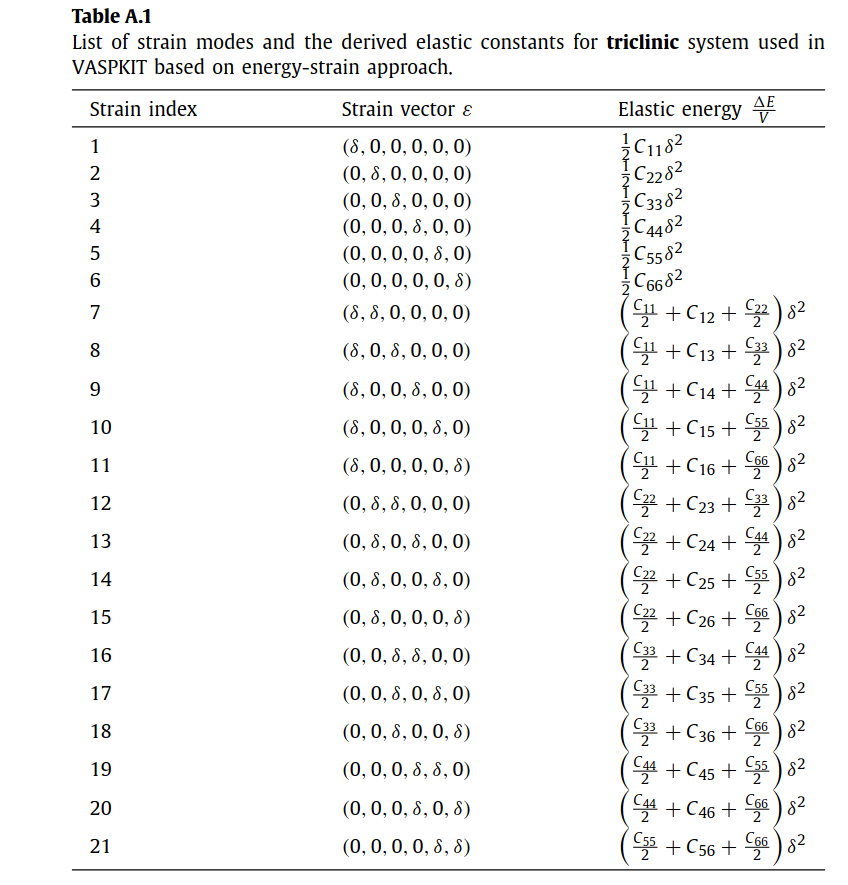
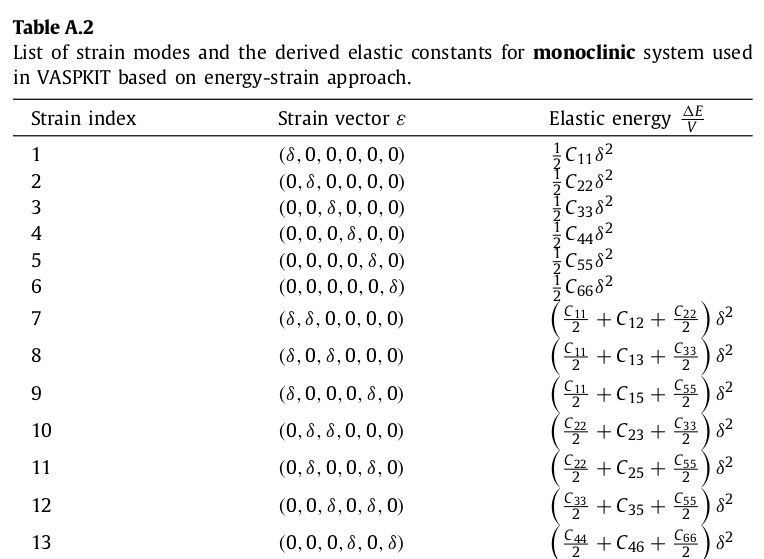

## DFT

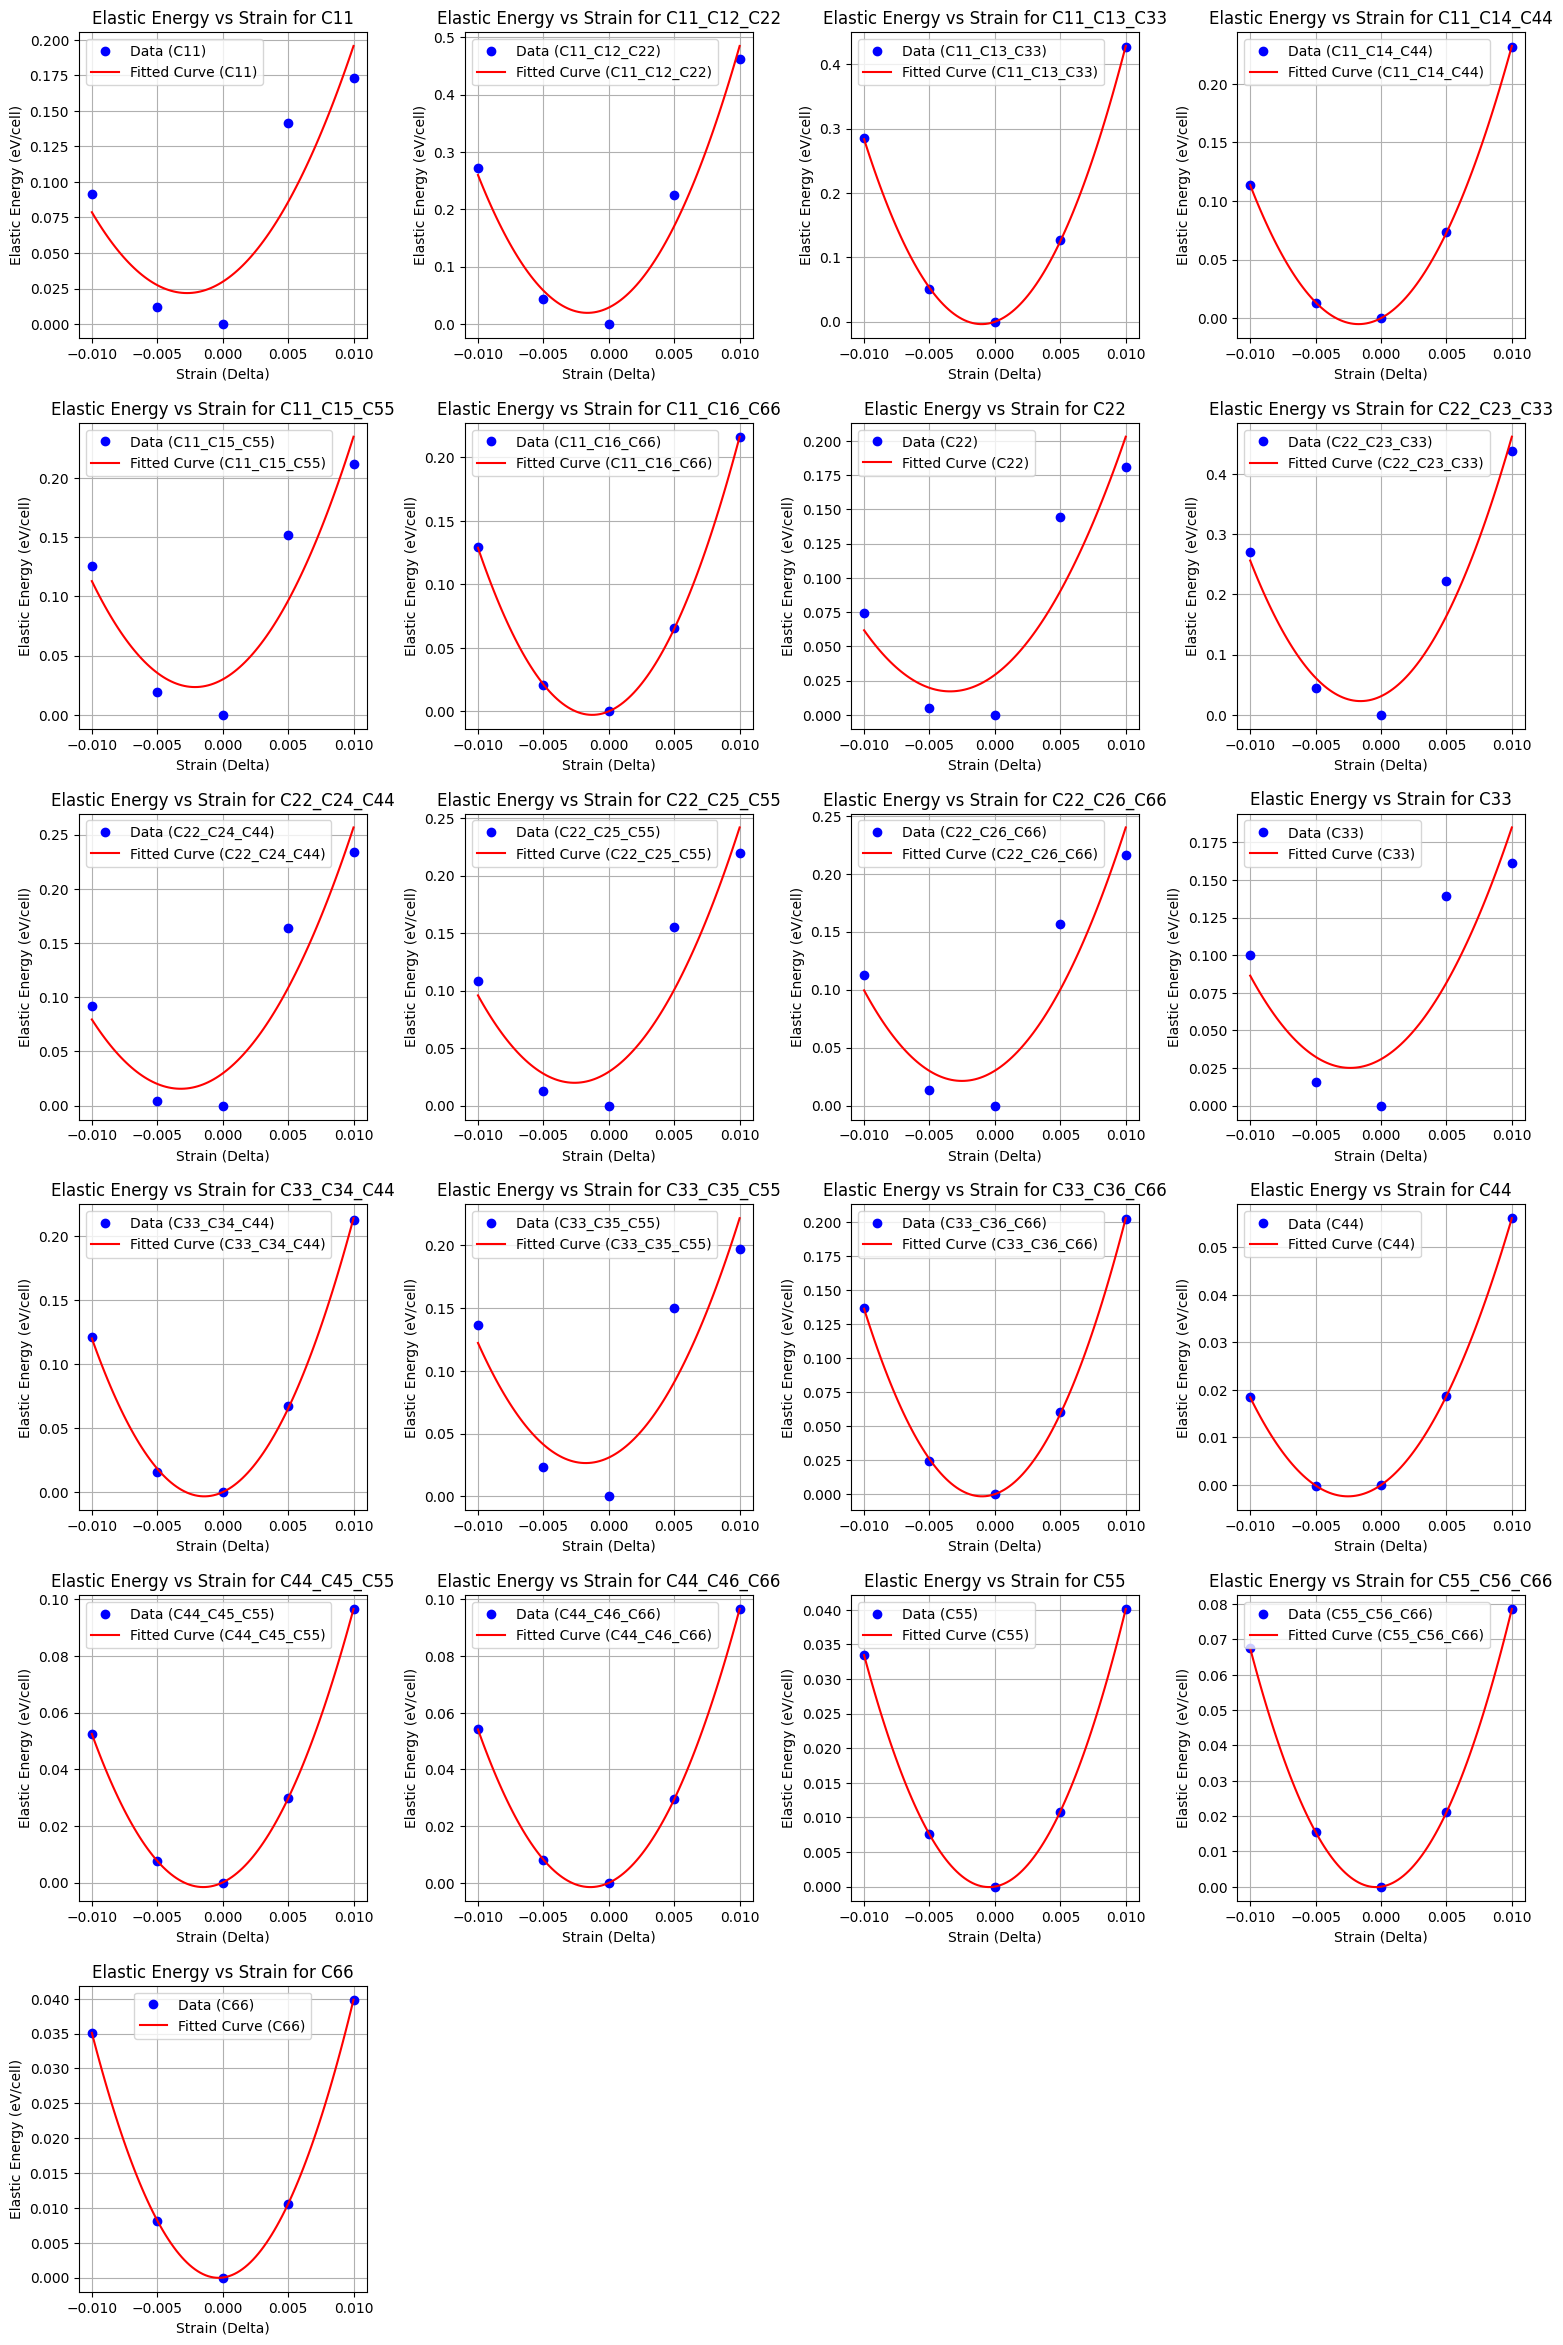

196.1852626568415
313.7460827162904
325.48076250375095
157.87529158909553
131.375691081566
157.60384881830305
188.5431046458491
299.92077158768694
126.32267950036267
127.44760098355634
127.46848119670811
191.4454542727933
152.4516562247928
128.9300961170235
154.84766068312257
68.08515501254998
68.04861463951987
68.82118252577297
67.21862616696637
66.74099129129411
68.46099884892283


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('energy_collab_potential_final')

# Extract the strain values
strain_values = data['Strain_values']

# Define formulas for each column based on the image
formulas = {
    'C11': lambda coef: 2 * coef,  # 1/2 * C11 * delta^2
    'C22': lambda coef: 2 * coef,  # 1/2 * C22 * delta^2
    'C33': lambda coef: 2 * coef,  # 1/2 * C33 * delta^2
    'C44': lambda coef: 2 * coef,  # 1/2 * C44 * delta^2
    'C55': lambda coef: 2 * coef,  # 1/2 * C55 * delta^2
    'C66': lambda coef: 2 * coef,  # 1/2 * C66 * delta^2
    'C11_C12_C22': lambda coef: 1 * coef,  # (C11/2 + C12 + C22/2) * delta^2
    'C11_C13_C33': lambda coef: 1 * coef,  # (C11/2 + C13 + C33/2) * delta^2
    'C11_C14_C44': lambda coef: 1 * coef,  # (C11/2 + C14 + C44/2) * delta^2
    'C11_C15_C55': lambda coef: 1 * coef,  # (C11/2 + C15 + C55/2) * delta^2
    'C11_C16_C66': lambda coef: 1 * coef,  # (C11/2 + C16 + C66/2) * delta^2
    'C22_C23_C33': lambda coef: 1 * coef,  # (C22/2 + C23 + C33/2) * delta^2
    'C22_C24_C44': lambda coef: 1 * coef, 
    'C22_C25_C55': lambda coef: 1 * coef,  # (C22/2 + C25 + C55/2) * delta^2
    'C22_C26_C66': lambda coef: 1 * coef,  # (C22/2 + C26 + C66/2) * delta^2
    'C33_C34_C44': lambda coef: 1 * coef,
    'C33_C35_C55': lambda coef: 1 * coef,  # (C33/2 + C35 + C55/2) * delta^2
    'C33_C36_C66': lambda coef: 1 * coef,  # (C33/2 + C36 + C66/2) * delta^2
    'C44_C45_C55': lambda coef: 1 * coef,
    'C44_C46_C66': lambda coef: 1 * coef,  # (C44/2 + C46 + C66/2) * delta^2
    'C55_C56_C66': lambda coef: 1 * coef
}

# The rest of the script remains the same

# Prepare to store computed C-values
C_values = {}
V0 = 1753.87

# Define subplot grid dimensions
num_columns = len(data.columns) - 1  # Excluding 'Strain_values'
num_rows = (num_columns + 3) // 4  # For a 3x4 grid layout, adjust as needed

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each column in the DataFrame (excluding 'Strain_values')
for i, column in enumerate(data.columns[1:]):
    # Fit a quadratic polynomial to the data
    coefficients = np.polyfit(strain_values, data[column], 2)
    
    # Apply the specific formula for each column
    if column in formulas:
        C_value = formulas[column](coefficients[0])
        C_values[column] = C_value * (160.21766/V0)
    else:
        print(f"No formula defined for {column}, skipping.")
        continue

    # Generate values for the fitted curve
    strain_fit = np.linspace(strain_values.min(), strain_values.max(), 100)
    energy_fit = np.polyval(coefficients, strain_fit)

    # Plot the data and the fitted curve in a subplot
    axs[i].plot(strain_values, data[column], 'o', label=f"Data ({column})", color="blue")
    axs[i].plot(strain_fit, energy_fit, '-', label=f"Fitted Curve ({column})", color="red")
    axs[i].set_title(f"Elastic Energy vs Strain for {column}")
    axs[i].set_xlabel("Strain (Delta)")
    axs[i].set_ylabel("Elastic Energy (eV/cell)")
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots (if number of columns < grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.show()

# Print out the calculated C-values
for key, value in C_values.items():
    #print(f"{key} C-value: {value} GPa")
    print(f"{value}")


## Potential

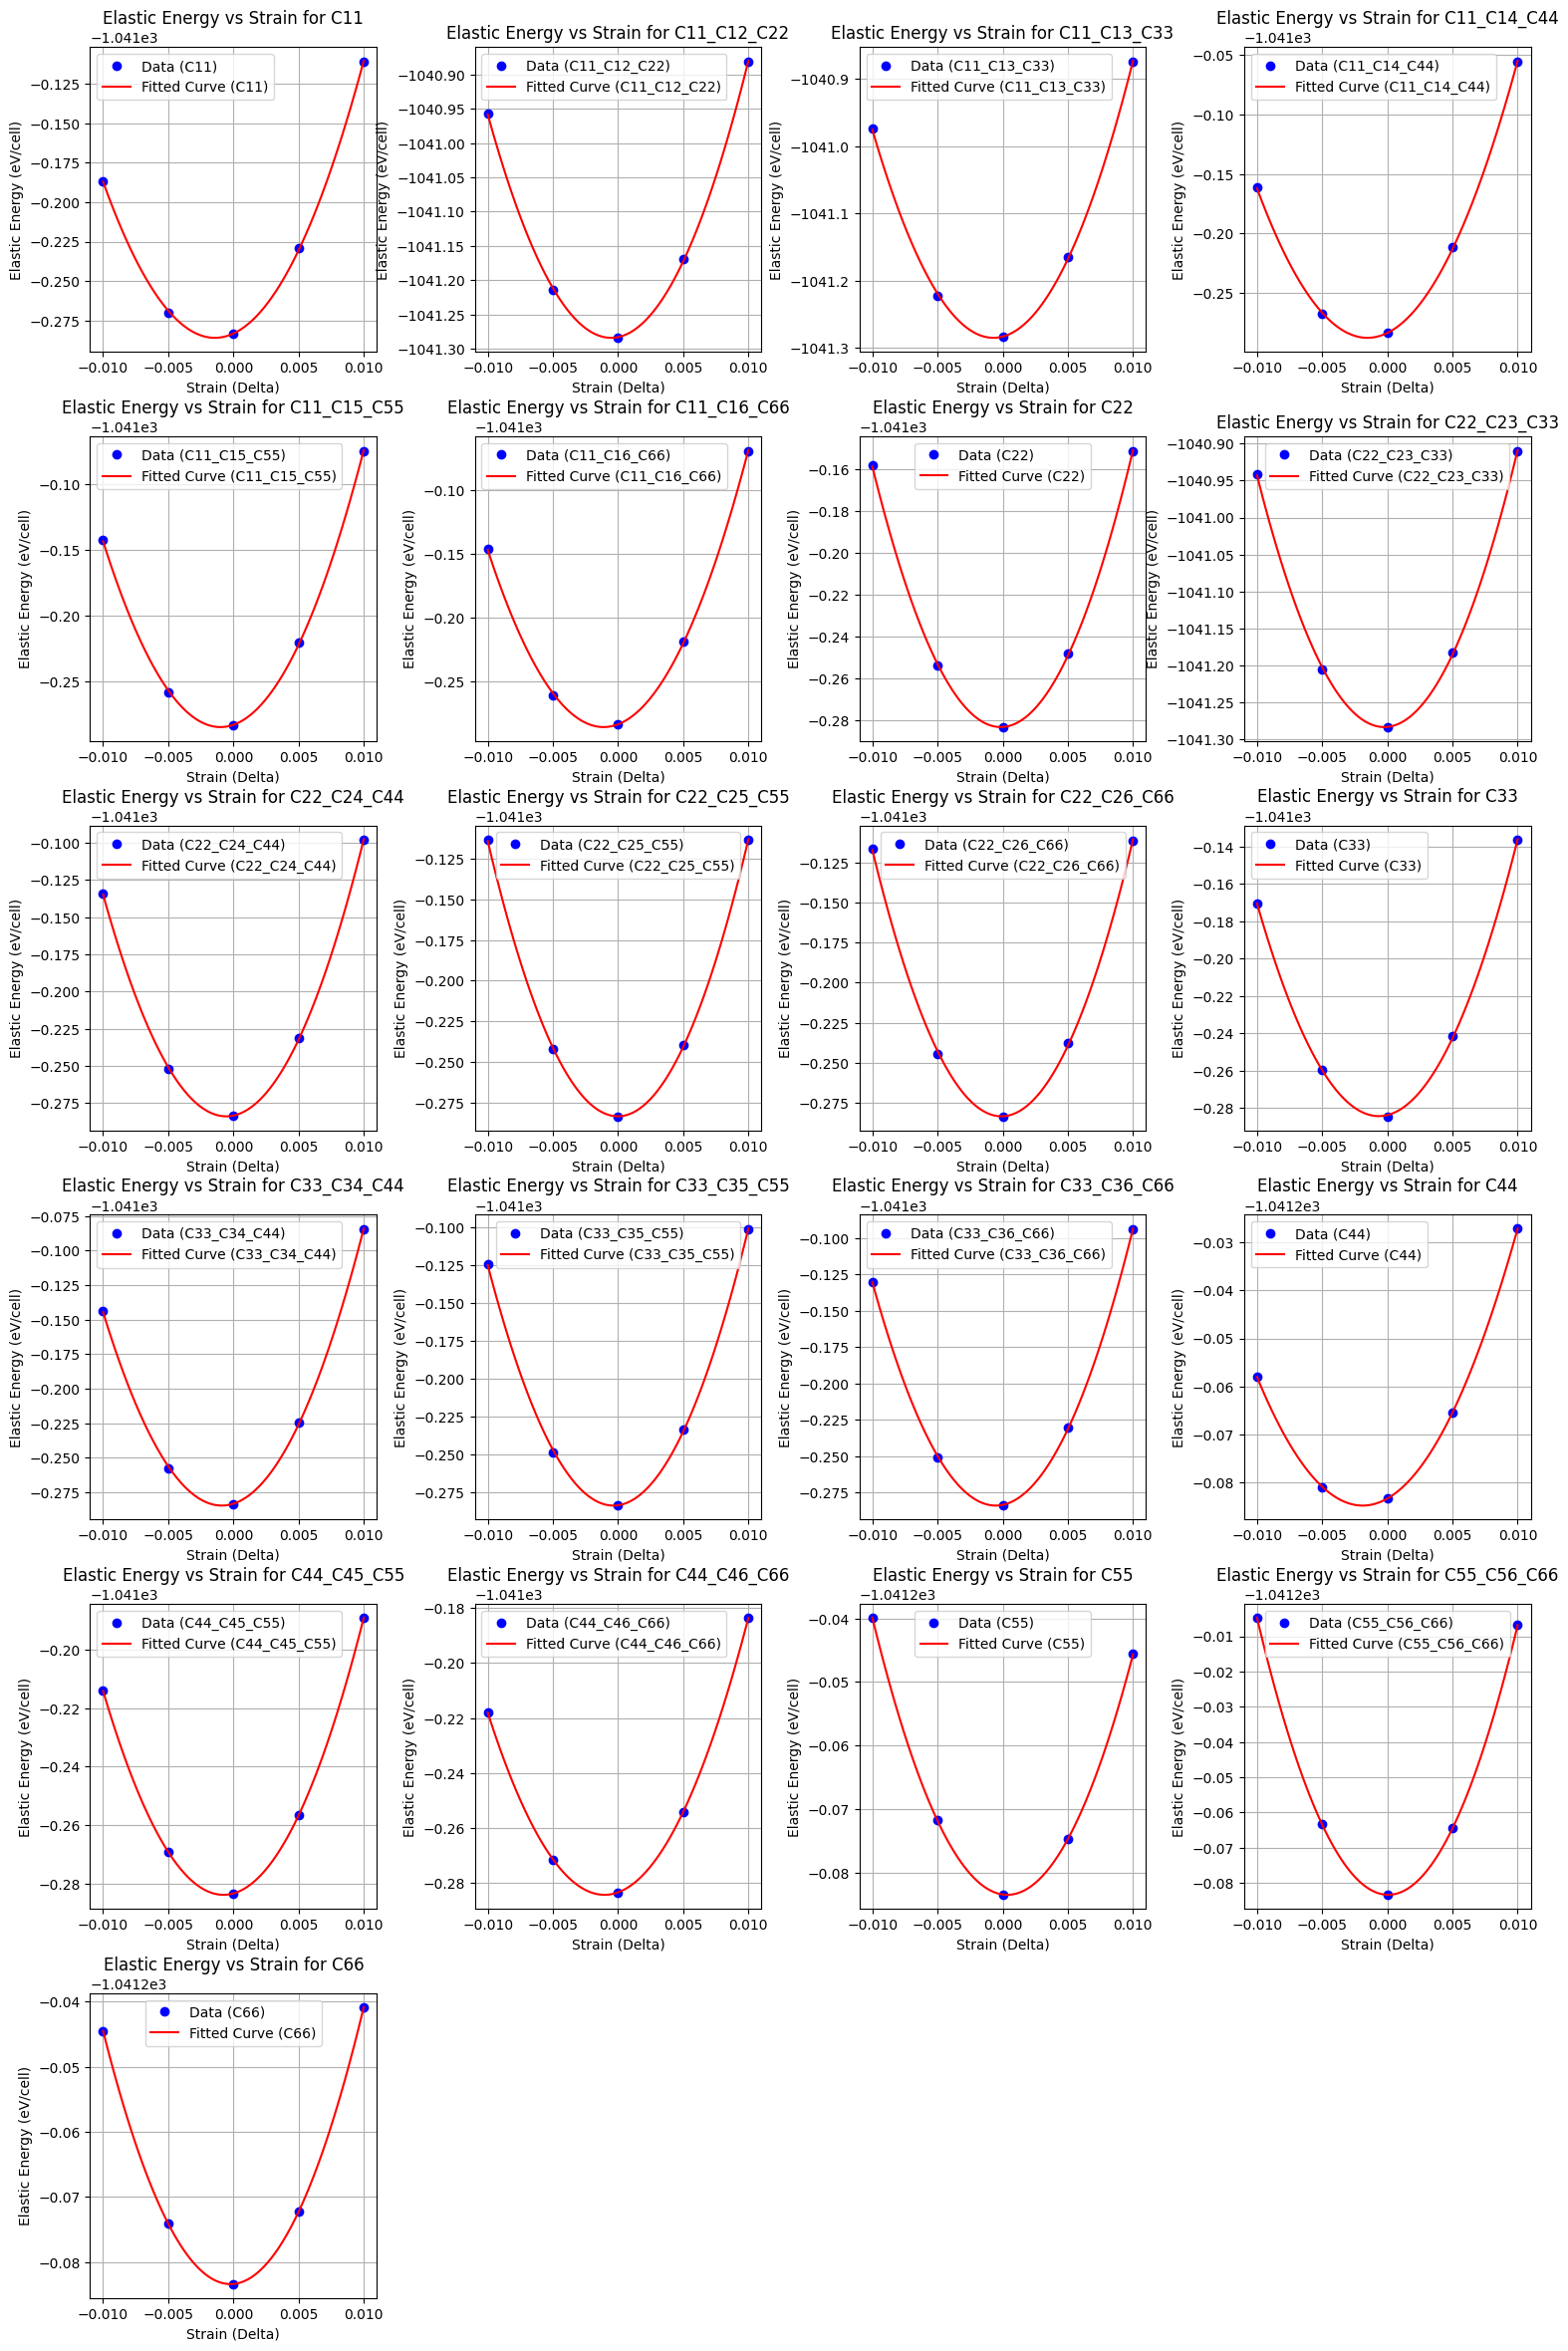

246.2355615201251
332.71898128349636
328.1545499317559
159.65545797473172
159.27961507030372
160.24569825567613
235.0361738209711
326.5249708864154
152.60223760369058
155.12122303826467
154.72608512504826
238.25493837664635
154.45559456252226
155.8028842474483
156.53739980356778
74.55039771716181
74.72979169067516
75.47774813301365
74.19293429250673
70.87514592402343
74.35595715234945


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('Ti_0.2_elastic_constants_potential.csv')

# Extract the strain values
strain_values = data['Strain_values']

# Define formulas for each column based on the image
formulas = {
    'C11': lambda coef: 2 * coef,  # 1/2 * C11 * delta^2
    'C22': lambda coef: 2 * coef,  # 1/2 * C22 * delta^2
    'C33': lambda coef: 2 * coef,  # 1/2 * C33 * delta^2
    'C44': lambda coef: 2 * coef,  # 1/2 * C44 * delta^2
    'C55': lambda coef: 2 * coef,  # 1/2 * C55 * delta^2
    'C66': lambda coef: 2 * coef,  # 1/2 * C66 * delta^2
    'C11_C12_C22': lambda coef: 1 * coef,  # (C11/2 + C12 + C22/2) * delta^2
    'C11_C13_C33': lambda coef: 1 * coef,  # (C11/2 + C13 + C33/2) * delta^2
    'C11_C14_C44': lambda coef: 1 * coef,  # (C11/2 + C14 + C44/2) * delta^2
    'C11_C15_C55': lambda coef: 1 * coef,  # (C11/2 + C15 + C55/2) * delta^2
    'C11_C16_C66': lambda coef: 1 * coef,  # (C11/2 + C16 + C66/2) * delta^2
    'C22_C23_C33': lambda coef: 1 * coef,  # (C22/2 + C23 + C33/2) * delta^2
    'C22_C24_C44': lambda coef: 1 * coef, 
    'C22_C25_C55': lambda coef: 1 * coef,  # (C22/2 + C25 + C55/2) * delta^2
    'C22_C26_C66': lambda coef: 1 * coef,  # (C22/2 + C26 + C66/2) * delta^2
    'C33_C34_C44': lambda coef: 1 * coef,
    'C33_C35_C55': lambda coef: 1 * coef,  # (C33/2 + C35 + C55/2) * delta^2
    'C33_C36_C66': lambda coef: 1 * coef,  # (C33/2 + C36 + C66/2) * delta^2
    'C44_C45_C55': lambda coef: 1 * coef,
    'C44_C46_C66': lambda coef: 1 * coef,  # (C44/2 + C46 + C66/2) * delta^2
    'C55_C56_C66': lambda coef: 1 * coef
}

# The rest of the script remains the same

# Prepare to store computed C-values
C_values = {}
V0 = 1753.87

# Define subplot grid dimensions
num_columns = len(data.columns) - 1  # Excluding 'Strain_values'
num_rows = (num_columns + 3) // 4  # For a 3x4 grid layout, adjust as needed

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each column in the DataFrame (excluding 'Strain_values')
for i, column in enumerate(data.columns[1:]):
    # Fit a quadratic polynomial to the data
    coefficients = np.polyfit(strain_values, data[column], 2)
    
    # Apply the specific formula for each column
    if column in formulas:
        C_value = formulas[column](coefficients[0])
        C_values[column] = C_value * (160.21766/V0)
    else:
        print(f"No formula defined for {column}, skipping.")
        continue

    # Generate values for the fitted curve
    strain_fit = np.linspace(strain_values.min(), strain_values.max(), 100)
    energy_fit = np.polyval(coefficients, strain_fit)

    # Plot the data and the fitted curve in a subplot
    axs[i].plot(strain_values, data[column], 'o', label=f"Data ({column})", color="blue")
    axs[i].plot(strain_fit, energy_fit, '-', label=f"Fitted Curve ({column})", color="red")
    axs[i].set_title(f"Elastic Energy vs Strain for {column}")
    axs[i].set_xlabel("Strain (Delta)")
    axs[i].set_ylabel("Elastic Energy (eV/cell)")
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots (if number of columns < grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.show()

# Print out the calculated C-values
for key, value in C_values.items():
    #print(f"{key} C-value: {value} GPa")
    print(f"{value}")


## Indiviual Elastic constant calculation using potential

In [4]:
from sympy import symbols, Eq, solve, Matrix

# Define the variables
C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56 = symbols('C11 C22 C33 C44 C55 C66 C12 C31 C14 C15 C16 C23 C24 C25 C26 C34 C35 C36 C45 C46 C56')

# Define the equations
eq1 = Eq(C11 -  196.185262656842, 0)  
eq2 = Eq(C22  - 188.543104645849, 0)
eq3 = Eq(C33  - 191.445454272793, 0)
eq4 = Eq(C44  - 68.08515501255, 0)
eq5 = Eq(C55 - 67.2186261669664, 0)
eq6 = Eq(C66  - 68.4609988489228, 0)
eq7 = Eq(C11/2 + C12 + C22/2  - 313.74608271629, 0)
eq8 = Eq(C11/2 + C31 + C33/2  - 325.480762503751, 0)
eq9 = Eq(C11/2 + C14 + C44/2  - 157.875291589096, 0)
eq10 = Eq(C11/2 + C15 + C55/2  - 131.375691081566, 0)
eq11 = Eq(C11/2 + C16 + C66/2  - 157.603848818303, 0)
eq12 = Eq(C22/2 + C23 + C33/2  - 299.920771587687, 0)
eq13 = Eq(C22/2 + C24 + C44/2  - 126.322679500363, 0)
eq14 = Eq(C22/2 + C25 + C55/2  - 127.447600983556, 0)
eq15 = Eq(C22/2 + C26 + C66/2  - 127.468481196708, 0)
eq16 = Eq(C33/2 + C34 + C44/2  - 152.451656224793, 0)
eq17 = Eq(C33/2 + C35 + C55/2  - 128.930096117024, 0)
eq18 = Eq(C33/2 + C36 + C66/2  - 154.847660683123, 0)
eq19 = Eq(C44/2 + C45 + C55/2  - 68.0486146395199, 0)
eq20 = Eq(C44/2 + C46 + C66/2  - 68.821182525773, 0)
eq21 = Eq(C55/2 + C56 + C66/2  - 66.7409912912941, 0)

# Solve the equations
solution = solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12, eq13, eq14, eq15, eq16, eq17, eq18, eq19, eq20, eq21], (C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56))

# Construct the elastic tensor with substituted values
elastic_tensor = Matrix([
    [C11, C12, C31, C14,  C15,   C16],
    [C12, C22, C23, C24,  C25,   C26],
    [C31, C23, C33, C34,  C35,   C36],
    [C14, C24, C34, C44,  C45,   C46],
    [C15, C25, C35, C45,  C55,   C56],
    [C16, C26, C36, C46,  C56,   C66]
]).subs(solution)

# Compute the compliance matrix
compliance_matrix = elastic_tensor.inv()

# Extract substituted compliance values
compliance_values = compliance_matrix.subs(solution)
S11 = compliance_values[0, 0]
S12 = compliance_values[0, 1]
S66 = compliance_values[5, 5]
S33 = compliance_values[2, 2]
S44 = compliance_values[3, 3]
S31 = compliance_values[2, 0]
S22 = compliance_values[1, 1]
S23 = compliance_values[1, 2]
S55 = compliance_values[4, 4]

# Voigt bounds equations
KV = ((solution[C11] + solution[C22] + solution[C33] + 
       2 * (solution[C12] + solution[C23] + solution[C31])) / 9)
GV = ((solution[C11] + solution[C22] + solution[C33]) - 
      (solution[C12] + solution[C23] + solution[C31]) + 
      4 * (solution[C44] + solution[C55] + solution[C66])) / 15

# Reuss bounds equations
KR = 1 / (S11 + S22 + S33 + 2 * (S12 + S23 + S31))
GR = 15 / (4 * (S11 + S22 + S33) - 4 * (S12 + S23 + S31) + 3 * (S44 + S55 + S66))

# Voigt-Reuss-Hill averages
K_VRH = (KV + KR) / 2
G_VRH = (GV + GR) / 2

# Print results
print("Solution:", solution)
print(f"Compliance Matrix:\n{compliance_values}")
print(f"Voigt Bulk Modulus, KV: {KV}")
print(f"Voigt Shear Modulus, GV: {GV}")
print(f"Reuss Bulk Modulus, KR: {KR}")
print(f"Reuss Shear Modulus, GR: {GR}")
print(f"K-VRH: {K_VRH}")
print(f"G-VRH: {G_VRH}")

Solution: {C11: 196.185262656842, C12: 121.381899064945, C14: 25.7400827544000, C15: -0.326253330338200, C16: 25.2807180654206, C22: 188.543104645849, C23: 109.926492128366, C24: -1.99145032883650, C25: -0.433264422851700, C26: -1.03357055067790, C31: 131.665404038934, C33: 191.445454272793, C34: 22.6863515821215, C35: -0.401944102855700, C36: 24.8944341222651, C44: 68.0851550125500, C45: 0.396724049761700, C46: 0.548105595036600, C55: 67.2186261669664, C56: -1.09882121665050, C66: 68.4609988489228}
Compliance Matrix:
Matrix([[0.0122525199845752, -0.00520682779082643, -0.00468386249830300, -0.00320044206347086, -3.02051275936705e-5, -0.00287479052203229], [-0.00520682779082643, 0.0106799183804456, -0.00337914459116819, 0.00338001880520426, 5.71372975890018e-5, 0.00328658458349573], [-0.00468386249830300, -0.00337914459116819, 0.0109111495511438, -0.00194539430763331, -4.95280054244298e-6, -0.00227351680683887], [-0.00320044206347086, 0.00338001880520426, -0.00194539430763331, 0.0166304

## Indiviual Elastic constant calculation using dft

In [3]:
from sympy import symbols, Eq, solve, Matrix

# Define the variables
C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56 = symbols('C11 C22 C33 C44 C55 C66 C12 C31 C14 C15 C16 C23 C24 C25 C26 C34 C35 C36 C45 C46 C56')

# Define the equations
eq1 = Eq(C11 - 237.77342718826 , 0)  
eq2 = Eq(C22 - 224.201288644112, 0)
eq3 = Eq(C33 - 262.359878166347, 0)
eq4 = Eq(C44 - 74.2291577302569, 0)
eq5 = Eq(C55 - 75.0643662560835, 0)
eq6 = Eq(C66 - 63.3192463622554, 0)
eq7 = Eq(C11/2 + C12 + C22/2  - 335.284022575311, 0)
eq8 = Eq(C11/2 + C31 + C33/2  - 333.404803392261, 0)
eq9 = Eq(C11/2 + C14 + C44/2  - 156.758200185871, 0)
eq10 = Eq(C11/2 + C15 + C55/2  - 155.479287130706, 0)
eq11 = Eq(C11/2 + C16 + C66/2  - 151.381545300966, 0)
eq12 = Eq(C22/2 + C23 + C33/2  - 331.943188472123, 0)
eq13 = Eq(C22/2 + C24 + C44/2  - 146.109291481878, 0)
eq14 = Eq(C22/2 + C25 + C55/2  - 149.919930380889, 0)
eq15 = Eq(C22/2 + C26 + C66/2  - 144.360573630951, 0)
eq16 = Eq(C33/2 + C34 + C44/2  - 168.738222477758, 0)
eq17 = Eq(C33/2 + C35 + C55/2  - 169.390729138553, 0)
eq18 = Eq(C33/2 + C36 + C66/2  - 162.89176279715, 0)
eq19 = Eq(C44/2 + C45 + C55/2  - 74.8555641246268, 0)
eq20 = Eq(C44/2 + C46 + C66/2  - 69.7399119041467, 0)
eq21 = Eq(C55/2 + C56 + C66/2  - 67.9911940532788, 0)

# Solve the equations
solution = solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12, eq13, eq14, eq15, eq16, eq17, eq18, eq19, eq20, eq21], (C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56))

# Construct the elastic tensor with substituted values
elastic_tensor = Matrix([
    [C11, C12, C31, C14,  C15,   C16],
    [C12, C22, C23, C24,  C25,   C26],
    [C31, C23, C33, C34,  C35,   C36],
    [C14, C24, C34, C44,  C45,   C46],
    [C15, C25, C35, C45,  C55,   C56],
    [C16, C26, C36, C46,  C56,   C66]
]).subs(solution)

# Compute the compliance matrix
compliance_matrix = elastic_tensor.inv()

# Extract substituted compliance values
compliance_values = compliance_matrix.subs(solution)
S11 = compliance_values[0, 0]
S12 = compliance_values[0, 1]
S66 = compliance_values[5, 5]
S33 = compliance_values[2, 2]
S44 = compliance_values[3, 3]
S31 = compliance_values[2, 0]
S22 = compliance_values[1, 1]
S23 = compliance_values[1, 2]
S55 = compliance_values[4, 4]

# Voigt bounds equations
KV = ((solution[C11] + solution[C22] + solution[C33] + 
       2 * (solution[C12] + solution[C23] + solution[C31])) / 9)
GV = ((solution[C11] + solution[C22] + solution[C33]) - 
      (solution[C12] + solution[C23] + solution[C31]) + 
      4 * (solution[C44] + solution[C55] + solution[C66])) / 15

# Reuss bounds equations
KR = 1 / (S11 + S22 + S33 + 2 * (S12 + S23 + S31))
GR = 15 / (4 * (S11 + S22 + S33) - 4 * (S12 + S23 + S31) + 3 * (S44 + S55 + S66))

# Voigt-Reuss-Hill averages
K_VRH = (KV + KR) / 2
G_VRH = (GV + GR) / 2

# Print results
print("Solution:", solution)
print(f"Compliance Matrix:\n{compliance_values}")
print(f"Voigt Bulk Modulus, KV: {KV}")
print(f"Voigt Shear Modulus, GV: {GV}")
print(f"Reuss Bulk Modulus, KR: {KR}")
print(f"Reuss Shear Modulus, GR: {GR}")
print(f"K-VRH: {K_VRH}")
print(f"G-VRH: {G_VRH}")

Solution: {C11: 237.773427188260, C12: 104.296664659125, C14: 0.756907726612550, C15: -0.939609591465750, C16: 0.835208525708300, C22: 224.201288644112, C23: 88.6626050668935, C24: -3.10593170530645, C25: 0.287102930791250, C26: 0.600306127767300, C31: 83.3381507149575, C33: 262.359878166347, C34: 0.443704529456050, C35: 0.678606927337750, C36: 0.0522005328488000, C44: 74.2291577302569, C45: 0.208802131456600, C46: 0.965709857890550, C55: 75.0643662560835, C56: -1.20061225589065, C66: 63.3192463622554}
Compliance Matrix:
Matrix([[0.00551302433112059, -0.00216310339888800, -0.00102017354378580, -0.000140250347492215, 8.61335198705450e-5, -4.75983712103972e-5], [-0.00216310339888800, 0.00600098682183855, -0.00134125229963854, 0.000281700863116385, -3.92034718816432e-5, -3.22947960236008e-5], [-0.00102017354378580, -0.00134125229963854, 0.00458912624227871, -7.33074325279650e-5, -4.85620029042144e-5, 2.25864083548791e-5], [-0.000140250347492215, 0.000281700863116385, -7.33074325279650e-5,

In [4]:
elastic_tensor

Matrix([
[  237.77342718826,  104.296664659125, 83.3381507149575,  0.75690772661255, -0.93960959146575,   0.8352085257083],
[ 104.296664659125,  224.201288644112, 88.6626050668935, -3.10593170530645,  0.28710293079125,   0.6003061277673],
[ 83.3381507149575,  88.6626050668935, 262.359878166347,  0.44370452945605,  0.67860692733775,   0.0522005328488],
[ 0.75690772661255, -3.10593170530645, 0.44370452945605,  74.2291577302569,   0.2088021314566,  0.96570985789055],
[-0.93960959146575,  0.28710293079125, 0.67860692733775,   0.2088021314566,  75.0643662560835, -1.20061225589065],
[  0.8352085257083,   0.6003061277673,  0.0522005328488,  0.96570985789055, -1.20061225589065,  63.3192463622554]])